In [280]:
import pandas as pd
import sqlite3
from matplotlib import pyplot as plt
import seaborn as sns

In [281]:
conn = sqlite3.connect('../zippedData/im.db')

## Connect to im.db database and join movie_basics, directors, persons and movie_ratings tables

In [332]:
query = """
SELECT DISTINCT mb.primary_title AS "Movie Name", mb.start_year AS "Release Year", mb.runtime_minutes AS "Length", mb.genres AS "Genres", p.primary_name AS "Director", mr.averagerating AS "Avg Rating", mr.numvotes AS "Number of Votes"

FROM movie_basics mb
    
    LEFT JOIN directors d
        ON mb.movie_id = d.movie_id
    LEFT JOIN persons p
        ON d.person_id = p.person_id
    LEFT JOIN movie_ratings mr
        ON mb.movie_id = mr.movie_id

WHERE mr.numvotes > 500

ORDER BY mr.averagerating DESC

"""
imdb_df = pd.read_sql_query(query, conn)
len(imdb_df)

15595

In [333]:
imdb_df.head()

,Movie Name,Release Year,Length,Genres,Director,Avg Rating,Number of Votes
0,Once Upon a Time ... in Hollywood,2019,159.0,"Comedy,Drama",Quentin Tarantino,9.7,5600
1,Eghantham,2018,125.0,Drama,Arsel Arumugam,9.7,639
2,Yeh Suhaagraat Impossible,2019,92.0,Comedy,Abhinav Thakur,9.6,624
3,Ananthu V/S Nusrath,2018,149.0,"Comedy,Drama,Family",Sudheer Shanbhogue,9.6,808
4,Ekvtime: Man of God,2018,132.0,"Biography,Drama,History",Nikoloz Khomasuridze,9.6,2604


## Read in csv file derived from tn_movie database

**The following csv file was created in a separate Jupyter Notebook called "Exploration_tn_movie_budgets". It has an added column containing just the release year as opposed to the full date.**

In [334]:
tn_df = pd.read_csv('../zippedData/NzModified_tn.movie_budgets.csv')

In [335]:
len(tn_df)

5782

In [336]:
tn_movie_list = tn_df['movie']

In [337]:
tn_df['movie'][0]

'Avatar'

In [338]:
imdb_df.keys()

Index(['Movie Name', 'Release Year', 'Length', 'Genres', 'Director',
       'Avg Rating', 'Number of Votes'],
      dtype='object')

In [339]:
imdb_df['Movie Name']

0                        Once Upon a Time ... in Hollywood
1                                                Eghantham
2                                Yeh Suhaagraat Impossible
3                                      Ananthu V/S Nusrath
4                                      Ekvtime: Man of God
                               ...                        
15590                         Browncoats: Independence War
15591    Kanagawa University of Fine Arts, Office of Fi...
15592                                             Yurameku
15593                                               Badang
15594                                        My First Love
Name: Movie Name, Length: 15595, dtype: object

In [340]:
imdb_df.loc[imdb_df['Movie Name'] == 'Yeh Suhaagraat Impossible']

,Movie Name,Release Year,Length,Genres,Director,Avg Rating,Number of Votes
2,Yeh Suhaagraat Impossible,2019,92.0,Comedy,Abhinav Thakur,9.6,624


In [341]:
imdb_df.loc[imdb_df['Movie Name'] == tn_df['movie'][3]]

,Movie Name,Release Year,Length,Genres,Director,Avg Rating,Number of Votes
2644,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Joss Whedon,7.3,665594


In [342]:
tn_df.loc[tn_df['movie'] == 'Avatar']

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009


## Merge imdb and tn dataframes with inner join on movie names

In [343]:
merged_df = imdb_df.merge(tn_df, left_on="Movie Name", right_on="movie", how='inner')

In [344]:
merged_df.head()

,Movie Name,Release Year,Length,Genres,Director,Avg Rating,Number of Votes,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,Frankenstein,2011,130.0,Drama,Danny Boyle,9.0,1832,1302,3,"Nov 4, 1994",Frankenstein,"$45,000,000","$22,006,296","$112,006,296",1994
1,Frankenstein,2015,89.0,"Horror,Sci-Fi,Thriller",Bernard Rose,5.1,2089,1302,3,"Nov 4, 1994",Frankenstein,"$45,000,000","$22,006,296","$112,006,296",1994
2,Inception,2010,148.0,"Action,Adventure,Sci-Fi",Christopher Nolan,8.8,1841066,137,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642",2010
3,Coriolanus,2014,192.0,"Drama,History,War",Tim Van Someren,8.7,1347,3698,99,"Jan 20, 2012",Coriolanus,"$10,000,000","$749,641","$2,179,623",2012
4,Coriolanus,2011,123.0,"Drama,Thriller,War",Ralph Fiennes,6.1,29654,3698,99,"Jan 20, 2012",Coriolanus,"$10,000,000","$749,641","$2,179,623",2012


In [345]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112 entries, 0 to 2111
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie Name         2112 non-null   object 
 1   Release Year       2112 non-null   int64  
 2   Length             2111 non-null   float64
 3   Genres             2112 non-null   object 
 4   Director           2112 non-null   object 
 5   Avg Rating         2112 non-null   float64
 6   Number of Votes    2112 non-null   int64  
 7   Unnamed: 0         2112 non-null   int64  
 8   id                 2112 non-null   int64  
 9   release_date       2112 non-null   object 
 10  movie              2112 non-null   object 
 11  production_budget  2112 non-null   object 
 12  domestic_gross     2112 non-null   object 
 13  worldwide_gross    2112 non-null   object 
 14  year               2112 non-null   int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 264.0+ KB


**This is a significantly reduced data set compared to the imdb database but still has sufficient number of records to derive trends.**

In [346]:
merged_df.sort_values(by=['domestic_gross'], ascending=False)

,Movie Name,Release Year,Length,Genres,Director,Avg Rating,Number of Votes,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
385,Christopher Robin,2018,104.0,"Adventure,Animation,Comedy",Marc Forster,7.3,52737,642,43,"Aug 3, 2018",Christopher Robin,"$75,000,000","$99,215,042","$197,504,758",2018
1401,Hercules,2014,98.0,"Action,Adventure,Fantasy",Brett Ratner,6.0,137287,707,8,"Jun 13, 1997",Hercules,"$70,000,000","$99,112,101","$250,700,000",1997
1022,Olympus Has Fallen,2013,119.0,"Action,Thriller",Antoine Fuqua,6.5,235443,708,9,"Mar 22, 2013",Olympus Has Fallen,"$70,000,000","$98,927,592","$172,878,928",2013
1521,The Green Hornet,2011,119.0,"Action,Comedy,Crime",Michel Gondry,5.8,148622,328,29,"Jan 14, 2011",The Green Hornet,"$110,000,000","$98,780,042","$229,155,503",2011
1179,Date Night,2010,88.0,"Comedy,Crime,Romance",Shawn Levy,6.3,144683,998,99,"Apr 9, 2010",Date Night,"$55,000,000","$98,711,404","$152,269,033",2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932,The Veil,2016,93.0,Horror,Phil Joanou,4.8,6895,4563,64,"Dec 31, 2015",The Veil,"$4,000,000",$0,$0,2015
1933,The Veil,2017,93.0,"Action,Adventure,Sci-Fi",Brent Ryan Green,3.5,1236,4563,64,"Dec 31, 2015",The Veil,"$4,000,000",$0,$0,2015
1691,Survivor,2015,96.0,"Action,Crime,Thriller",James McTeigue,5.6,28614,2710,11,"May 29, 2015",Survivor,"$20,000,000",$0,"$1,703,281",2015
1935,Dawn Patrol,2014,88.0,"Drama,Thriller",Daniel Petrie Jr.,4.8,615,4631,32,"Jun 5, 2015",Dawn Patrol,"$3,500,000",$0,$0,2015


In [347]:
# sorted_df = merged_df.sort_values(by=['Director','domestic_gross'], ascending=False)
# sorted_df.head()

In [348]:
# directors = list(set(sorted_df['Director']))
# type(directors)

In [349]:
director = "Quentin Tarantino"
merged_df.loc[merged_df['Director'] == director]

,Movie Name,Release Year,Length,Genres,Director,Avg Rating,Number of Votes,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
19,Django Unchained,2012,165.0,"Drama,Western",Quentin Tarantino,8.4,1211405,368,69,"Dec 25, 2012",Django Unchained,"$100,000,000","$162,805,434","$449,948,323",2012
130,The Hateful Eight,2015,168.0,"Crime,Drama,Mystery",Quentin Tarantino,7.8,434966,832,33,"Dec 25, 2015",The Hateful Eight,"$62,000,000","$54,117,416","$147,864,886",2015


In [350]:
# del merged_df['float_worldwide_gross']

In [351]:
merged_df['float_production_budget'] = merged_df['production_budget'].replace('[\$,]', '', regex=True).astype(float)
merged_df['float_domestic_gross'] = merged_df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
merged_df['float_worldwide_gross'] = merged_df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

In [352]:
merged_df['profit percent'] = (merged_df['float_domestic_gross'] + merged_df['float_worldwide_gross'] - merged_df['float_production_budget']) / merged_df['float_production_budget'] * 100

In [353]:
merged_df.head()

,Movie Name,Release Year,Length,Genres,Director,Avg Rating,Number of Votes,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,float_production_budget,float_domestic_gross,float_worldwide_gross,profit percent
0,Frankenstein,2011,130.0,Drama,Danny Boyle,9.0,1832,1302,3,"Nov 4, 1994",Frankenstein,"$45,000,000","$22,006,296","$112,006,296",1994,45000000.0,22006296.0,112006296.0,197.805760
1,Frankenstein,2015,89.0,"Horror,Sci-Fi,Thriller",Bernard Rose,5.1,2089,1302,3,"Nov 4, 1994",Frankenstein,"$45,000,000","$22,006,296","$112,006,296",1994,45000000.0,22006296.0,112006296.0,197.805760
2,Inception,2010,148.0,"Action,Adventure,Sci-Fi",Christopher Nolan,8.8,1841066,137,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642",2010,160000000.0,292576195.0,835524642.0,605.063023
3,Coriolanus,2014,192.0,"Drama,History,War",Tim Van Someren,8.7,1347,3698,99,"Jan 20, 2012",Coriolanus,"$10,000,000","$749,641","$2,179,623",2012,10000000.0,749641.0,2179623.0,-70.707360
4,Coriolanus,2011,123.0,"Drama,Thriller,War",Ralph Fiennes,6.1,29654,3698,99,"Jan 20, 2012",Coriolanus,"$10,000,000","$749,641","$2,179,623",2012,10000000.0,749641.0,2179623.0,-70.707360


In [367]:
# merged_df.groupby(by='Director')[['Avg Rating', 'float_production_budget', 'float_domestic_gross', 'float_worldwide_gross', 'profit percent']].agg(['mean', 'count'])

In [355]:
# director_df = merged_df.groupby(by='Director')[['Director','Avg Rating', 'Number of Votes', 'float_production_budget', 'profit percent']].agg(['mean', 'count'])

director_count = merged_df.groupby(by='Director')['Director'].count()
director_means = merged_df.groupby(by='Director')[['Avg Rating', 'Number of Votes', 'float_production_budget', 'float_domestic_gross', 'float_worldwide_gross', 'profit percent']].mean()

director_means['count'] = director_count
director_means

,Avg Rating,Number of Votes,float_production_budget,float_domestic_gross,float_worldwide_gross,profit percent,count
Director,,,,,,,
Aaron Hann,6.0,30645.0,2000000.0,10024.0,10024.0,-98.997600,1
Aaron Seltzer,3.4,43984.0,20000000.0,36661504.0,81424988.0,490.432460,1
Aaron T. Wells,3.5,2230.0,500000.0,0.0,0.0,-100.000000,1
Abby Kohn,5.4,39936.0,32000000.0,48795601.0,91553797.0,338.591869,1
Abdolreza Kahani,7.0,903.0,4000000.0,0.0,63180.0,-98.420500,1
...,...,...,...,...,...,...,...
Zackary Adler,5.0,1723.0,2500000.0,0.0,0.0,-100.000000,1
Zak Forsman,5.2,846.0,50000.0,0.0,0.0,-100.000000,1
Zal Batmanglij,6.7,33095.5,3317500.0,1341332.0,1728702.0,250.960751,2


## Sort of Directors by Count of Movie Releases ##

In [356]:
director_sort_by_count_df = director_means.sort_values(by=['count', 'Avg Rating','profit percent','float_production_budget'], ascending=False)

In [357]:
director_sort_by_count_df.index

Index(['David Gordon Green', 'Steven Spielberg', 'Clint Eastwood',
       'Steven Soderbergh', 'Ridley Scott', 'Tim Story', 'Jaume Collet-Serra',
       'Tim Burton', 'Jon M. Chu', 'Denis Villeneuve',
       ...
       'Matthew R. Anderson', 'Jamie Buckner', 'Timothy Woodward Jr.',
       'Glenn Ciano', 'David Winning', 'David DeCoteau', 'Kaizad Gustad',
       'Frédéric Auburtin', 'Justin Price', 'Lawrence Kasanoff'],
      dtype='object', name='Director', length=1426)

In [358]:
director_sort_by_count_df['profit percent']

Director
David Gordon Green    5088.186541
Steven Spielberg       350.989351
Clint Eastwood         460.359244
Steven Soderbergh      863.150048
Ridley Scott           253.484348
                         ...     
David DeCoteau        -100.000000
Kaizad Gustad          -77.774000
Frédéric Auburtin      -99.434167
Justin Price          -100.000000
Lawrence Kasanoff      -99.836209
Name: profit percent, Length: 1426, dtype: float64

In [359]:
# sns.barplot(x=director_sort_by_count_df['profit percent'].head(20), 
#             y=director_sort_by_count_df.index[0:20], 
#             data=director_sort_by_count_df,
#             orient='h', color='Blue').set_xlabel('Profit Percentage')

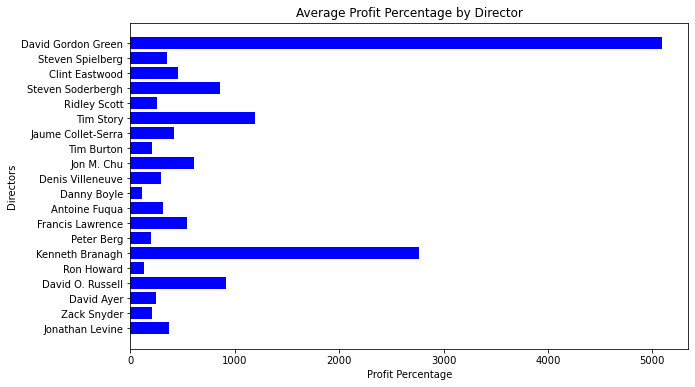

In [360]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(director_sort_by_count_df.index[0:20], director_sort_by_count_df['profit percent'].head(20), color='blue')
ax.invert_yaxis()
ax.set_title("Average Profit Percentage by Director")
ax.set_xlabel('Profit Percentage')
ax.set_ylabel('Directors')
plt.savefig('Profit_Percentage_by_Director_for_High_Movie_Count.png',bbox_inches='tight')

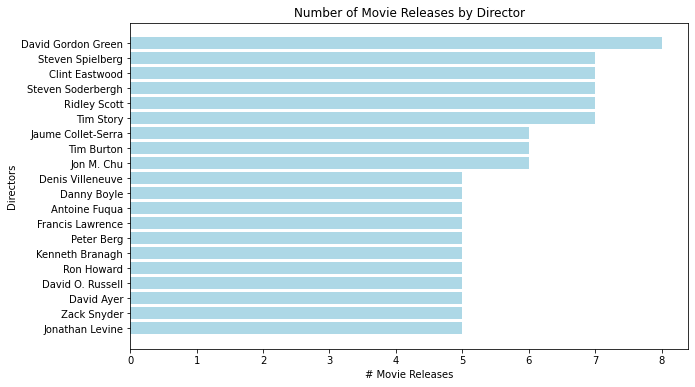

In [361]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(director_sort_by_count_df.index[0:20], director_sort_by_count_df['count'].head(20), color='lightblue')
ax.invert_yaxis()
ax.set_title("Number of Movie Releases by Director")
ax.set_xlabel('# Movie Releases')
ax.set_ylabel('Directors')
plt.savefig('High_Count_of_Movie_Releases_by_Director.png',bbox_inches='tight')

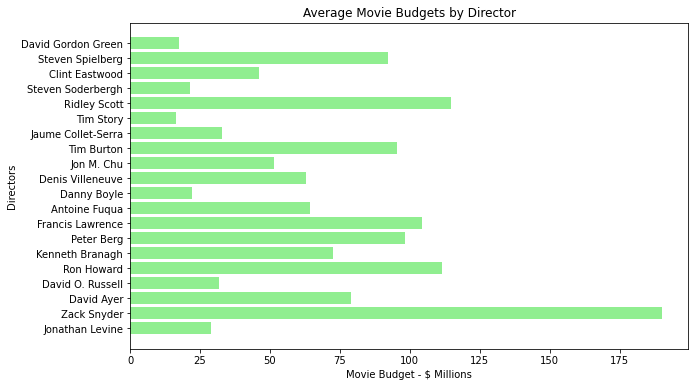

In [362]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(director_sort_by_count_df.index[0:20], director_sort_by_count_df['float_production_budget'].head(20)/1000000, color='lightgreen')
ax.invert_yaxis()
ax.set_title("Average Movie Budgets by Director")
ax.set_xlabel('Movie Budget - $ Millions')
ax.set_ylabel('Directors')
plt.savefig('Movie_Budgets_of_Directors_with_High_Count_of_Movie_Releases.png',bbox_inches='tight')

## Sort of Directors by Profitability ##

In [363]:
director_sort_by_profit_df = director_means.sort_values(by=['profit percent'], ascending=False)
director_sort_by_profit_df.head(20)
# ,'count', 'Avg Rating','float_production_budget'

,Avg Rating,Number of Votes,float_production_budget,float_domestic_gross,float_worldwide_gross,profit percent,count
Director,,,,,,,
Travis Cluff,4.200000,17763.000,100000.0,2.276441e+07,4.165647e+07,64320.884000,1
Chris Lofing,4.200000,17763.000,100000.0,2.276441e+07,4.165647e+07,64320.884000,1
Brandon Camp,6.400000,2779.000,500000.0,3.155956e+07,3.155956e+07,12523.824000,1
Levan Gabriadze,5.600000,62043.000,1000000.0,3.278964e+07,6.436420e+07,9615.384300,1
Nate Parker,6.400000,18442.000,5055000.0,1.293078e+07,1.394551e+07,9609.217430,2
Tod Williams,5.700000,93122.000,3000000.0,8.475291e+07,1.775120e+08,8642.164633,1
Jamie Buckner,2.900000,557.000,5000000.0,1.381416e+08,2.789648e+08,8242.127820,1
William Brent Bell,5.100000,51239.500,5500000.0,4.454125e+07,8.499022e+07,8171.324290,2
Bradley Parker,5.000000,60304.000,1000000.0,1.811964e+07,4.241172e+07,5953.136100,1


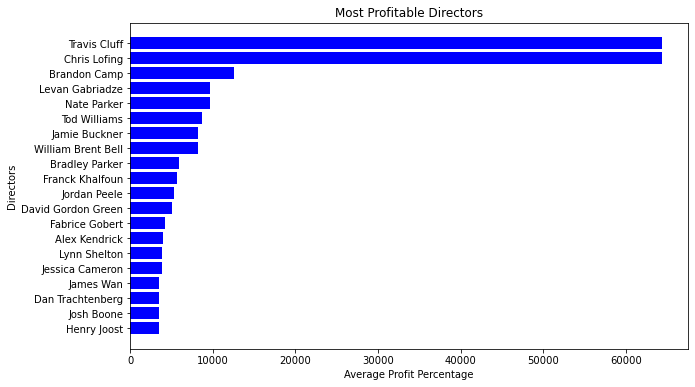

In [364]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(director_sort_by_profit_df.index[0:20], director_sort_by_profit_df['profit percent'].head(20), color='blue')
ax.invert_yaxis()
ax.set_title("Most Profitable Directors")
ax.set_xlabel('Average Profit Percentage')
ax.set_ylabel('Directors')
plt.savefig('Most_Profitable_Directors.png')

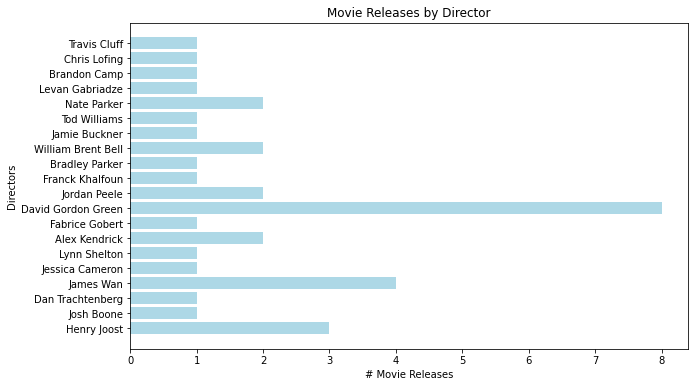

In [365]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(director_sort_by_profit_df.index[0:20], director_sort_by_profit_df['count'].head(20), color='lightblue')
ax.invert_yaxis()
ax.set_title("Movie Releases by Director")
ax.set_xlabel('# Movie Releases')
ax.set_ylabel('Directors')
plt.savefig('Count_of_Movie_Releases_by_Most_Profitable_Directors.png',bbox_inches='tight')

## Sort of Movie Length by Profitability ##

In [376]:
merged_sort_by_Length = merged_df.sort_values(by=['Length'], ascending=False)
merged_sort_by_Length

,Movie Name,Release Year,Length,Genres,Director,Avg Rating,Number of Votes,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,float_production_budget,float_domestic_gross,float_worldwide_gross,profit percent
5,Hamlet,2015,217.0,Drama,Robin Lough,8.6,1587,2831,32,"Dec 25, 1996",Hamlet,"$18,000,000","$4,501,094","$7,129,670",1996,18000000.0,4501094.0,7129670.0,-35.384644
6,Hamlet,2015,217.0,Drama,Robin Lough,8.6,1587,4933,34,"May 12, 2000",Hamlet,"$2,000,000","$1,577,287","$2,419,669",2000,2000000.0,1577287.0,2419669.0,99.847800
3,Coriolanus,2014,192.0,"Drama,History,War",Tim Van Someren,8.7,1347,3698,99,"Jan 20, 2012",Coriolanus,"$10,000,000","$749,641","$2,179,623",2012,10000000.0,749641.0,2179623.0,-70.707360
30,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",Martin Scorsese,8.2,1035358,375,76,"Dec 25, 2013",The Wolf of Wall Street,"$100,000,000","$116,900,694","$389,870,414",2013,100000000.0,116900694.0,389870414.0,406.771108
762,Jab Tak Hai Jaan,2012,176.0,"Drama,Romance",Yash Chopra,6.8,48364,3763,64,"Nov 13, 2012",Jab Tak Hai Jaan,"$9,200,000","$3,047,539","$5,806,666",2012,9200000.0,3047539.0,5806666.0,-3.758641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,Aroused,2013,66.0,Documentary,Deborah Anderson,5.3,596,5663,64,"May 3, 2013",Aroused,"$150,000",$0,$0,2013,150000.0,0.0,0.0,-100.000000
714,Unstoppable,2013,65.0,Documentary,Darren Doane,4.3,551,418,19,"Nov 12, 2010",Unstoppable,"$95,000,000","$81,562,942","$165,720,921",2010,95000000.0,81562942.0,165720921.0,160.298803
414,Winnie the Pooh,2011,63.0,"Adventure,Animation,Comedy",Stephen J. Anderson,7.2,19605,1938,39,"Jul 15, 2011",Winnie the Pooh,"$30,000,000","$26,692,846","$50,145,607",2011,30000000.0,26692846.0,50145607.0,156.128177
415,Winnie the Pooh,2011,63.0,"Adventure,Animation,Comedy",Don Hall,7.2,19605,1938,39,"Jul 15, 2011",Winnie the Pooh,"$30,000,000","$26,692,846","$50,145,607",2011,30000000.0,26692846.0,50145607.0,156.128177


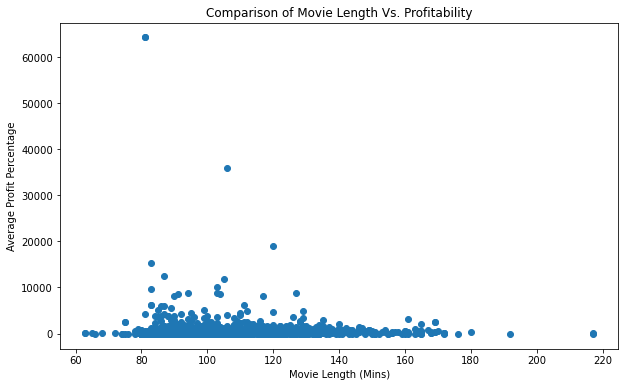

In [404]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=merged_sort_by_Length['Length'],y=merged_sort_by_Length['profit percent'])
ax.set_title("Comparison of Movie Length Vs. Profitability")
ax.set_xlabel('Movie Length (Mins)')
ax.set_ylabel('Average Profit Percentage')
plt.savefig('Movie_Length_Vs_Profitability.png',bbox_inches='tight')

In [380]:
merged_sort_by_Profit_Percent_under_10k = merged_df.sort_values(by=['profit percent'], ascending=False)[10:-1]
merged_sort_by_Profit_Percent_under_10k.head(20)

,Movie Name,Release Year,Length,Genres,Director,Avg Rating,Number of Votes,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,float_production_budget,float_domestic_gross,float_worldwide_gross,profit percent
252,Home,2016,103.0,Drama,Fien Troch,7.2,811,5459,60,"Apr 23, 2009",Home,"$500,000","$15,433","$44,793,168",2009,500000.0,15433.0,44793168.0,8861.720200
255,Home,2015,94.0,"Adventure,Animation,Comedy",Tim Johnson,6.6,85831,5459,60,"Apr 23, 2009",Home,"$500,000","$15,433","$44,793,168",2009,500000.0,15433.0,44793168.0,8861.720200
1593,Paranormal Activity 2,2010,91.0,Horror,Tod Williams,5.7,93122,4664,65,"Oct 20, 2010",Paranormal Activity 2,"$3,000,000","$84,752,907","$177,512,032",2010,3000000.0,84752907.0,177512032.0,8642.164633
152,Get Out,2017,104.0,"Horror,Mystery,Thriller",Jordan Peele,7.7,400474,4248,49,"Feb 24, 2017",Get Out,"$5,000,000","$176,040,665","$255,367,951",2017,5000000.0,176040665.0,255367951.0,8528.172320
381,Split,2016,90.0,"Comedy,Romance,Sport",Jamie Buckner,2.9,557,4249,50,"Jan 20, 2017",Split,"$5,000,000","$138,141,585","$278,964,806",2017,5000000.0,138141585.0,278964806.0,8242.127820
380,Split,2016,117.0,"Horror,Thriller",M. Night Shyamalan,7.3,358543,4249,50,"Jan 20, 2017",Split,"$5,000,000","$138,141,585","$278,964,806",2017,5000000.0,138141585.0,278964806.0,8242.127820
1525,Paranormal Activity 3,2011,83.0,"Horror,Mystery,Thriller",Henry Joost,5.8,85689,4250,51,"Oct 21, 2011",Paranormal Activity 3,"$5,000,000","$104,028,807","$207,039,844",2011,5000000.0,104028807.0,207039844.0,6121.373020
1526,Paranormal Activity 3,2011,83.0,"Horror,Mystery,Thriller",Ariel Schulman,5.8,85689,4250,51,"Oct 21, 2011",Paranormal Activity 3,"$5,000,000","$104,028,807","$207,039,844",2011,5000000.0,104028807.0,207039844.0,6121.373020
268,Moonlight,2016,111.0,Drama,Barry Jenkins,7.4,227964,5063,64,"Oct 21, 2016",Moonlight,"$1,500,000","$27,854,931","$65,245,512",2016,1500000.0,27854931.0,65245512.0,6106.696200
1662,The Last Exorcism,2010,87.0,"Drama,Horror,Thriller",Daniel Stamm,5.6,45815,5014,15,"Aug 27, 2010",The Last Exorcism,"$1,800,000","$41,034,350","$70,165,900",2010,1800000.0,41034350.0,70165900.0,6077.791667


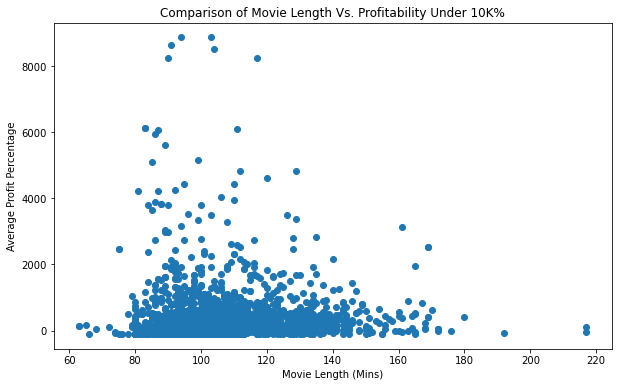

In [405]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=merged_sort_by_Profit_Percent_under_10k['Length'],y=merged_sort_by_Profit_Percent_under_10k['profit percent'])
ax.set_title("Comparison of Movie Length Vs. Profitability Under 10K%")
ax.set_xlabel('Movie Length (Mins)')
ax.set_ylabel('Average Profit Percentage')
plt.savefig('Movie_Length_Vs_Profitability_Under_10K.png',bbox_inches='tight')

In [389]:
merged_sort_by_Profit_Percent_under_2k = merged_df.sort_values(by=['profit percent'], ascending=False)[82:-1]
merged_sort_by_Profit_Percent_under_2k.head()

,Movie Name,Release Year,Length,Genres,Director,Avg Rating,Number of Votes,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,float_production_budget,float_domestic_gross,float_worldwide_gross,profit percent
95,Boyhood,2014,165.0,Drama,Richard Linklater,7.9,315584,4484,85,"Jul 11, 2014",Boyhood,"$4,000,000","$25,379,975","$57,273,049",2014,4000000.0,25379975.0,57273049.0,1966.32560
263,Kevin Hart: Laugh at My Pain,2011,89.0,"Comedy,Documentary",Tim Story,7.4,5081,5374,75,"Sep 9, 2011",Kevin Hart: Laugh at My Pain,"$750,000","$7,706,436","$7,712,436",2011,750000.0,7706436.0,7712436.0,1955.84960
262,Kevin Hart: Laugh at My Pain,2011,89.0,"Comedy,Documentary",Leslie Small,7.4,5081,5374,75,"Sep 9, 2011",Kevin Hart: Laugh at My Pain,"$750,000","$7,706,436","$7,712,436",2011,750000.0,7706436.0,7712436.0,1955.84960
539,The Gift,2015,108.0,"Drama,Mystery,Thriller",Joel Edgerton,7.1,123834,4262,63,"Aug 7, 2015",The Gift,"$5,000,000","$43,787,265","$58,978,477",2015,5000000.0,43787265.0,58978477.0,1955.31484
1021,The Purge: Anarchy,2014,103.0,"Action,Horror,Sci-Fi",James DeMonaco,6.5,126203,3770,71,"Jul 18, 2014",The Purge: Anarchy,"$9,000,000","$71,562,550","$111,534,881",2014,9000000.0,71562550.0,111534881.0,1934.41590


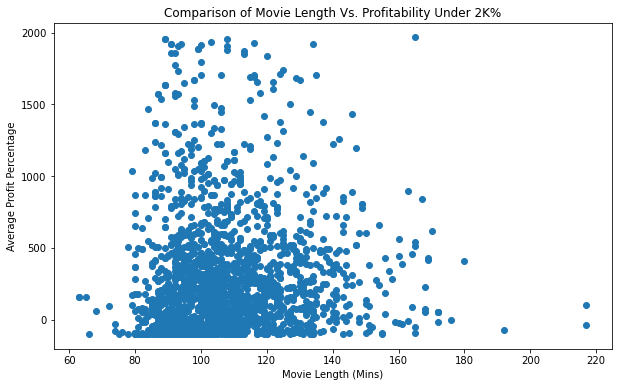

In [410]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=merged_sort_by_Profit_Percent_under_2k['Length'],y=merged_sort_by_Profit_Percent_under_2k['profit percent'])
ax.set_title("Comparison of Movie Length Vs. Profitability Under 2K%")
ax.set_xlabel('Movie Length (Mins)')
ax.set_ylabel('Average Profit Percentage')
plt.savefig('Movie_Length_Vs_Profitability_Under_2K.png',bbox_inches='tight')